# Cohort Analysis

Cohort analysis is a process of analyzing the behavior of groups of customers. In this project, we are going to create cohort analysis of customer retention rate, average sales quantity, and average selling price over

## 1. Data Preparation

### 1.1. Importing Packages and Dataset

In [1]:
#Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Import the dataset
retail = pd.read_csv("D:/datacamp/Python/Customer Segmentation/online12M.csv")

In [3]:
#Take a look at the first 5 columns of the dataset
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,581580,22908,PACK OF 20 NAPKINS RED APPLES,2,12/9/2011,0.85,12748,United Kingdom
1,581538,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,12/9/2011,1.45,14446,United Kingdom
2,581538,22197,POPCORN HOLDER,4,12/9/2011,0.85,14446,United Kingdom
3,581514,22075,6 RIBBONS ELEGANT CHRISTMAS,24,12/9/2011,0.39,17754,United Kingdom
4,581571,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,24,12/9/2011,2.55,15311,United Kingdom


### 1.2. Data Inspection

In [4]:
#Find out the datatype of each column
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68191 entries, 0 to 68190
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    68191 non-null  int64  
 1   StockCode    68191 non-null  object 
 2   Description  68191 non-null  object 
 3   Quantity     68191 non-null  int64  
 4   InvoiceDate  68191 non-null  object 
 5   UnitPrice    68191 non-null  float64
 6   CustomerID   68191 non-null  int64  
 7   Country      68191 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 4.2+ MB


In [5]:
#The type of InvoiceDate column is not right. Convert it into datetime type
retail.InvoiceDate= pd.to_datetime(retail.InvoiceDate)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68191 entries, 0 to 68190
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    68191 non-null  int64         
 1   StockCode    68191 non-null  object        
 2   Description  68191 non-null  object        
 3   Quantity     68191 non-null  int64         
 4   InvoiceDate  68191 non-null  datetime64[ns]
 5   UnitPrice    68191 non-null  float64       
 6   CustomerID   68191 non-null  int64         
 7   Country      68191 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.2+ MB


### 1.3. Preparing Necessary Columns for Cohort Tables

We'll create cohort tables for customer retention rate, average quantity, and average selling price analysis purpose.
In order to do so, we need to have the following variables:
    1. Invoice Month - month of the transaction done
    2. Cohort Month - the earliest month of transaction done by certain customers
    3. Month offset - difference of invoice and cohort months

In [6]:
#Create a function which defines transaction month in date format
def get_month(x): 
    return dt.datetime(x.year, x.month, 1)

In [7]:
#Create a new group which displays trasaction month in date format
retail['InvoiceMonth'] = retail['InvoiceDate'].apply(get_month)

In [8]:
#Create a new group which displays cohort month (the earliest month of transaction of customers)
grouping = retail.groupby('CustomerID')['InvoiceMonth']
retail['CohortMonth'] = grouping.transform('min')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,581580,22908,PACK OF 20 NAPKINS RED APPLES,2,2011-12-09,0.85,12748,United Kingdom,2011-12-01,2010-12-01
1,581538,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2011-12-09,1.45,14446,United Kingdom,2011-12-01,2011-04-01
2,581538,22197,POPCORN HOLDER,4,2011-12-09,0.85,14446,United Kingdom,2011-12-01,2011-04-01
3,581514,22075,6 RIBBONS ELEGANT CHRISTMAS,24,2011-12-09,0.39,17754,United Kingdom,2011-12-01,2011-03-01
4,581571,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,24,2011-12-09,2.55,15311,United Kingdom,2011-12-01,2010-12-01


In [9]:
#Create a function which transforms year, month and day into numeric formats
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [10]:
#Create a column which displays the cohort index
invoice_year, invoice_month, _ = get_date_int(retail, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(retail, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
retail['CohortIndex'] = years_diff*12 + months_diff + 1
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,581580,22908,PACK OF 20 NAPKINS RED APPLES,2,2011-12-09,0.85,12748,United Kingdom,2011-12-01,2010-12-01,13
1,581538,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2011-12-09,1.45,14446,United Kingdom,2011-12-01,2011-04-01,9
2,581538,22197,POPCORN HOLDER,4,2011-12-09,0.85,14446,United Kingdom,2011-12-01,2011-04-01,9
3,581514,22075,6 RIBBONS ELEGANT CHRISTMAS,24,2011-12-09,0.39,17754,United Kingdom,2011-12-01,2011-03-01,10
4,581571,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,24,2011-12-09,2.55,15311,United Kingdom,2011-12-01,2010-12-01,13


## 2. Data Analysis 

### 2.1. Customer Retention Rate

In [11]:
#Create a cohort table the number of customers on each transaction month and cohort month
grouping = retail.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,383.0,149.0,145.0,156.0,165.0,180.0,160.0,147.0,154.0,160.0,150.0,208.0,113.0
2011-01-01,429.0,109.0,134.0,123.0,161.0,139.0,126.0,130.0,160.0,146.0,180.0,77.0,NaN
2011-02-01,352.0,67.0,67.0,94.0,97.0,85.0,91.0,98.0,100.0,113.0,36.0,NaN,NaN
2011-03-01,422.0,67.0,113.0,88.0,91.0,74.0,113.0,94.0,122.0,44.0,NaN,NaN,NaN
2011-04-01,279.0,61.0,60.0,59.0,58.0,59.0,67.0,70.0,18.0,NaN,NaN,NaN,NaN
2011-05-01,267.0,41.0,47.0,41.0,55.0,62.0,68.0,25.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,214.0,33.0,27.0,43.0,49.0,64.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,185.0,29.0,33.0,42.0,47.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,145.0,30.0,30.0,36.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Calculate the retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes,axis=0)
retention = retention.round(3)*100
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.9,37.9,40.7,43.1,47.0,41.8,38.4,40.2,41.8,39.2,54.3,29.5
2011-01-01,100.0,25.4,31.2,28.7,37.5,32.4,29.4,30.3,37.3,34.0,42.0,17.9,NaN
2011-02-01,100.0,19.0,19.0,26.7,27.6,24.1,25.9,27.8,28.4,32.1,10.2,NaN,NaN
2011-03-01,100.0,15.9,26.8,20.9,21.6,17.5,26.8,22.3,28.9,10.4,NaN,NaN,NaN
2011-04-01,100.0,21.9,21.5,21.1,20.8,21.1,24.0,25.1,6.5,NaN,NaN,NaN,NaN
2011-05-01,100.0,15.4,17.6,15.4,20.6,23.2,25.5,9.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,15.4,12.6,20.1,22.9,29.9,8.9,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,15.7,17.8,22.7,25.4,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,20.7,24.8,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


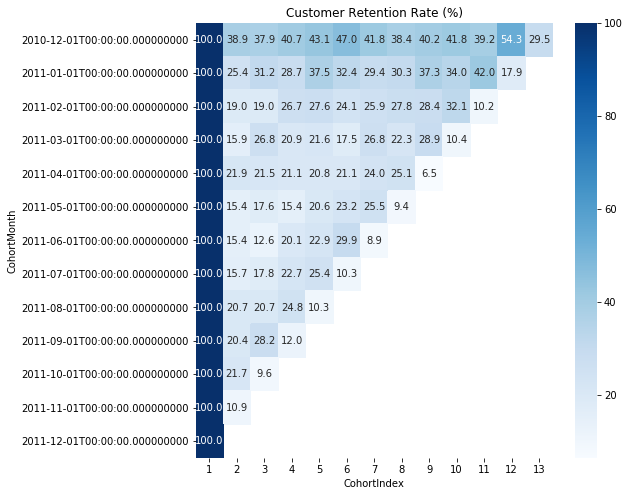

In [27]:
#Plot the cohort table of customer retention rate
plt.figure(figsize=(8,8))
sns.heatmap(retention, annot = True, fmt = '.1f', cmap='Blues')
plt.title('Customer Retention Rate (%)')
plt.show()

#### Highlights :
    1. Retention rates on Nov 2011 were the highest among other months for transactions began on Dec 2010 - Oct 2011
    2. Retention rates on Dec 2011 were the lowest among other months for transactions began on Dec 2010 - Nov 2011
    3. Transactions on Dec 2010 made the highest customer engagement of all months, followed by Jan 2011

### 2.2. Average Sales Quantity

In [14]:
#Create a cohort table of average sales quantity on each transaction month and cohort month
cohort_quantity_data = grouping['Quantity'].mean().reset_index()
avg_quantity = cohort_quantity_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'Quantity')
avg_quantity = avg_quantity.round(1)
avg_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,12.0,13.3,11.3,13.5,13.5,11.5,9.8,12.6,14.7,12.8,15.5,11.3,14.4
2011-01-01,10.8,11.0,10.7,9.9,12.9,11.4,14.6,13.6,15.7,10.1,11.1,11.0,NaN
2011-02-01,12.7,16.5,14.9,11.5,17.5,13.2,16.5,13.2,13.4,16.1,18.3,NaN,NaN
2011-03-01,9.6,14.2,12.3,9.7,15.5,12.4,10.9,10.7,8.3,9.4,NaN,NaN,NaN
2011-04-01,9.9,10.6,11.4,11.3,11.4,7.4,10.0,9.4,6.4,NaN,NaN,NaN,NaN
2011-05-01,14.2,18.4,21.7,13.0,17.4,12.9,11.7,13.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.4,16.1,18.4,10.8,12.4,7.2,9.7,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,10.7,16.3,9.9,11.5,6.7,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.2,7.4,6.0,5.8,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


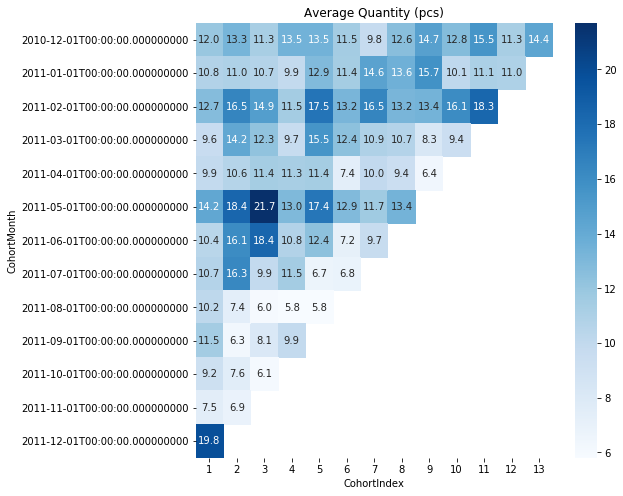

In [28]:
#Plot the cohort table of average sales quantity
plt.figure(figsize=(8,8))
sns.heatmap(avg_quantity, annot = True, fmt = '.1f', cmap='Blues')
plt.title('Average Quantity (pcs)')
plt.show()

#### Highlights :
    1. Customers which had their third transaction occured on Jul 2011 bought the highest average number of items sold
    2. Customers which had their fourth and fifth transactions occured on Nov 2011 and Dec 2011, respectively, bought the 
    lowest average number of items sold

### 2.3. Average Selling Price

In [16]:
#Create a cohort table of average selling price on each transaction month and cohort month
cohort_price_data = grouping['UnitPrice'].mean().reset_index()
avg_price = cohort_price_data.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'UnitPrice')
avg_price = avg_price.round(1)
avg_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.2,3.0,3.0,3.0,2.6,8.4,2.7,3.1,2.7,2.7,2.9,2.9,2.7
2011-01-01,3.2,3.3,2.8,3.1,3.0,3.0,2.9,2.6,2.7,3.0,2.5,2.2,NaN
2011-02-01,3.0,3.8,3.2,2.9,3.3,3.0,2.9,2.6,2.9,2.7,2.7,NaN,NaN
2011-03-01,3.4,3.5,3.5,2.8,2.7,2.5,2.6,2.9,2.6,2.6,NaN,NaN,NaN
2011-04-01,3.3,4.3,3.3,2.6,2.9,2.8,2.8,2.7,2.6,NaN,NaN,NaN,NaN
2011-05-01,3.3,2.9,2.6,2.7,2.6,2.4,2.8,2.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.8,2.4,2.7,3.1,2.5,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.1,3.1,3.4,2.5,2.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.9,3.7,5.3,6.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


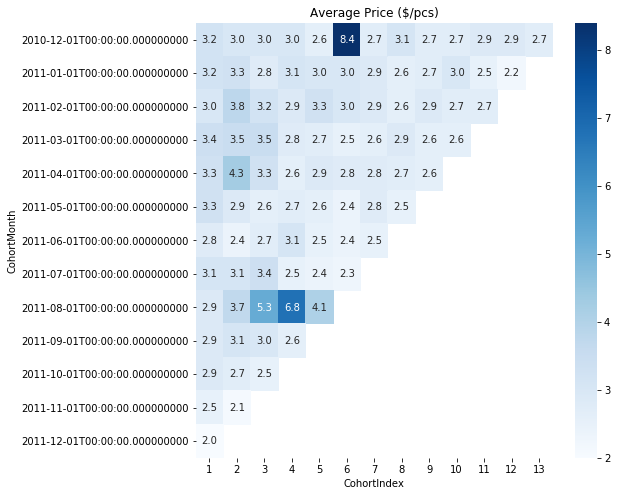

In [29]:
#Plot the cohort table of average selling price
plt.figure(figsize=(8,8))
sns.heatmap(avg_price, annot = True, fmt = '.1f', cmap='Blues')
plt.title('Average Price ($/pcs)')
plt.show()

#### Highlights :
    1. Most of customers spent 2-3 dollars on their transaction
    2. Customers which had their sixth transaction on Jun 2011 spent the most money.
    3. Customers which had their third and fourth transactions on Oct-Nov 11 spent relatively higher money than other 
    customers spent